In [1]:
import torch 
from torchvision import utils, models, datasets, transforms
from PIL import Image
import urllib.request as request
import matplotlib.pyplot as plt 
%matplotlib inline

### Pre-trained model

In [2]:
inc = models.inception_v3(pretrained=True)

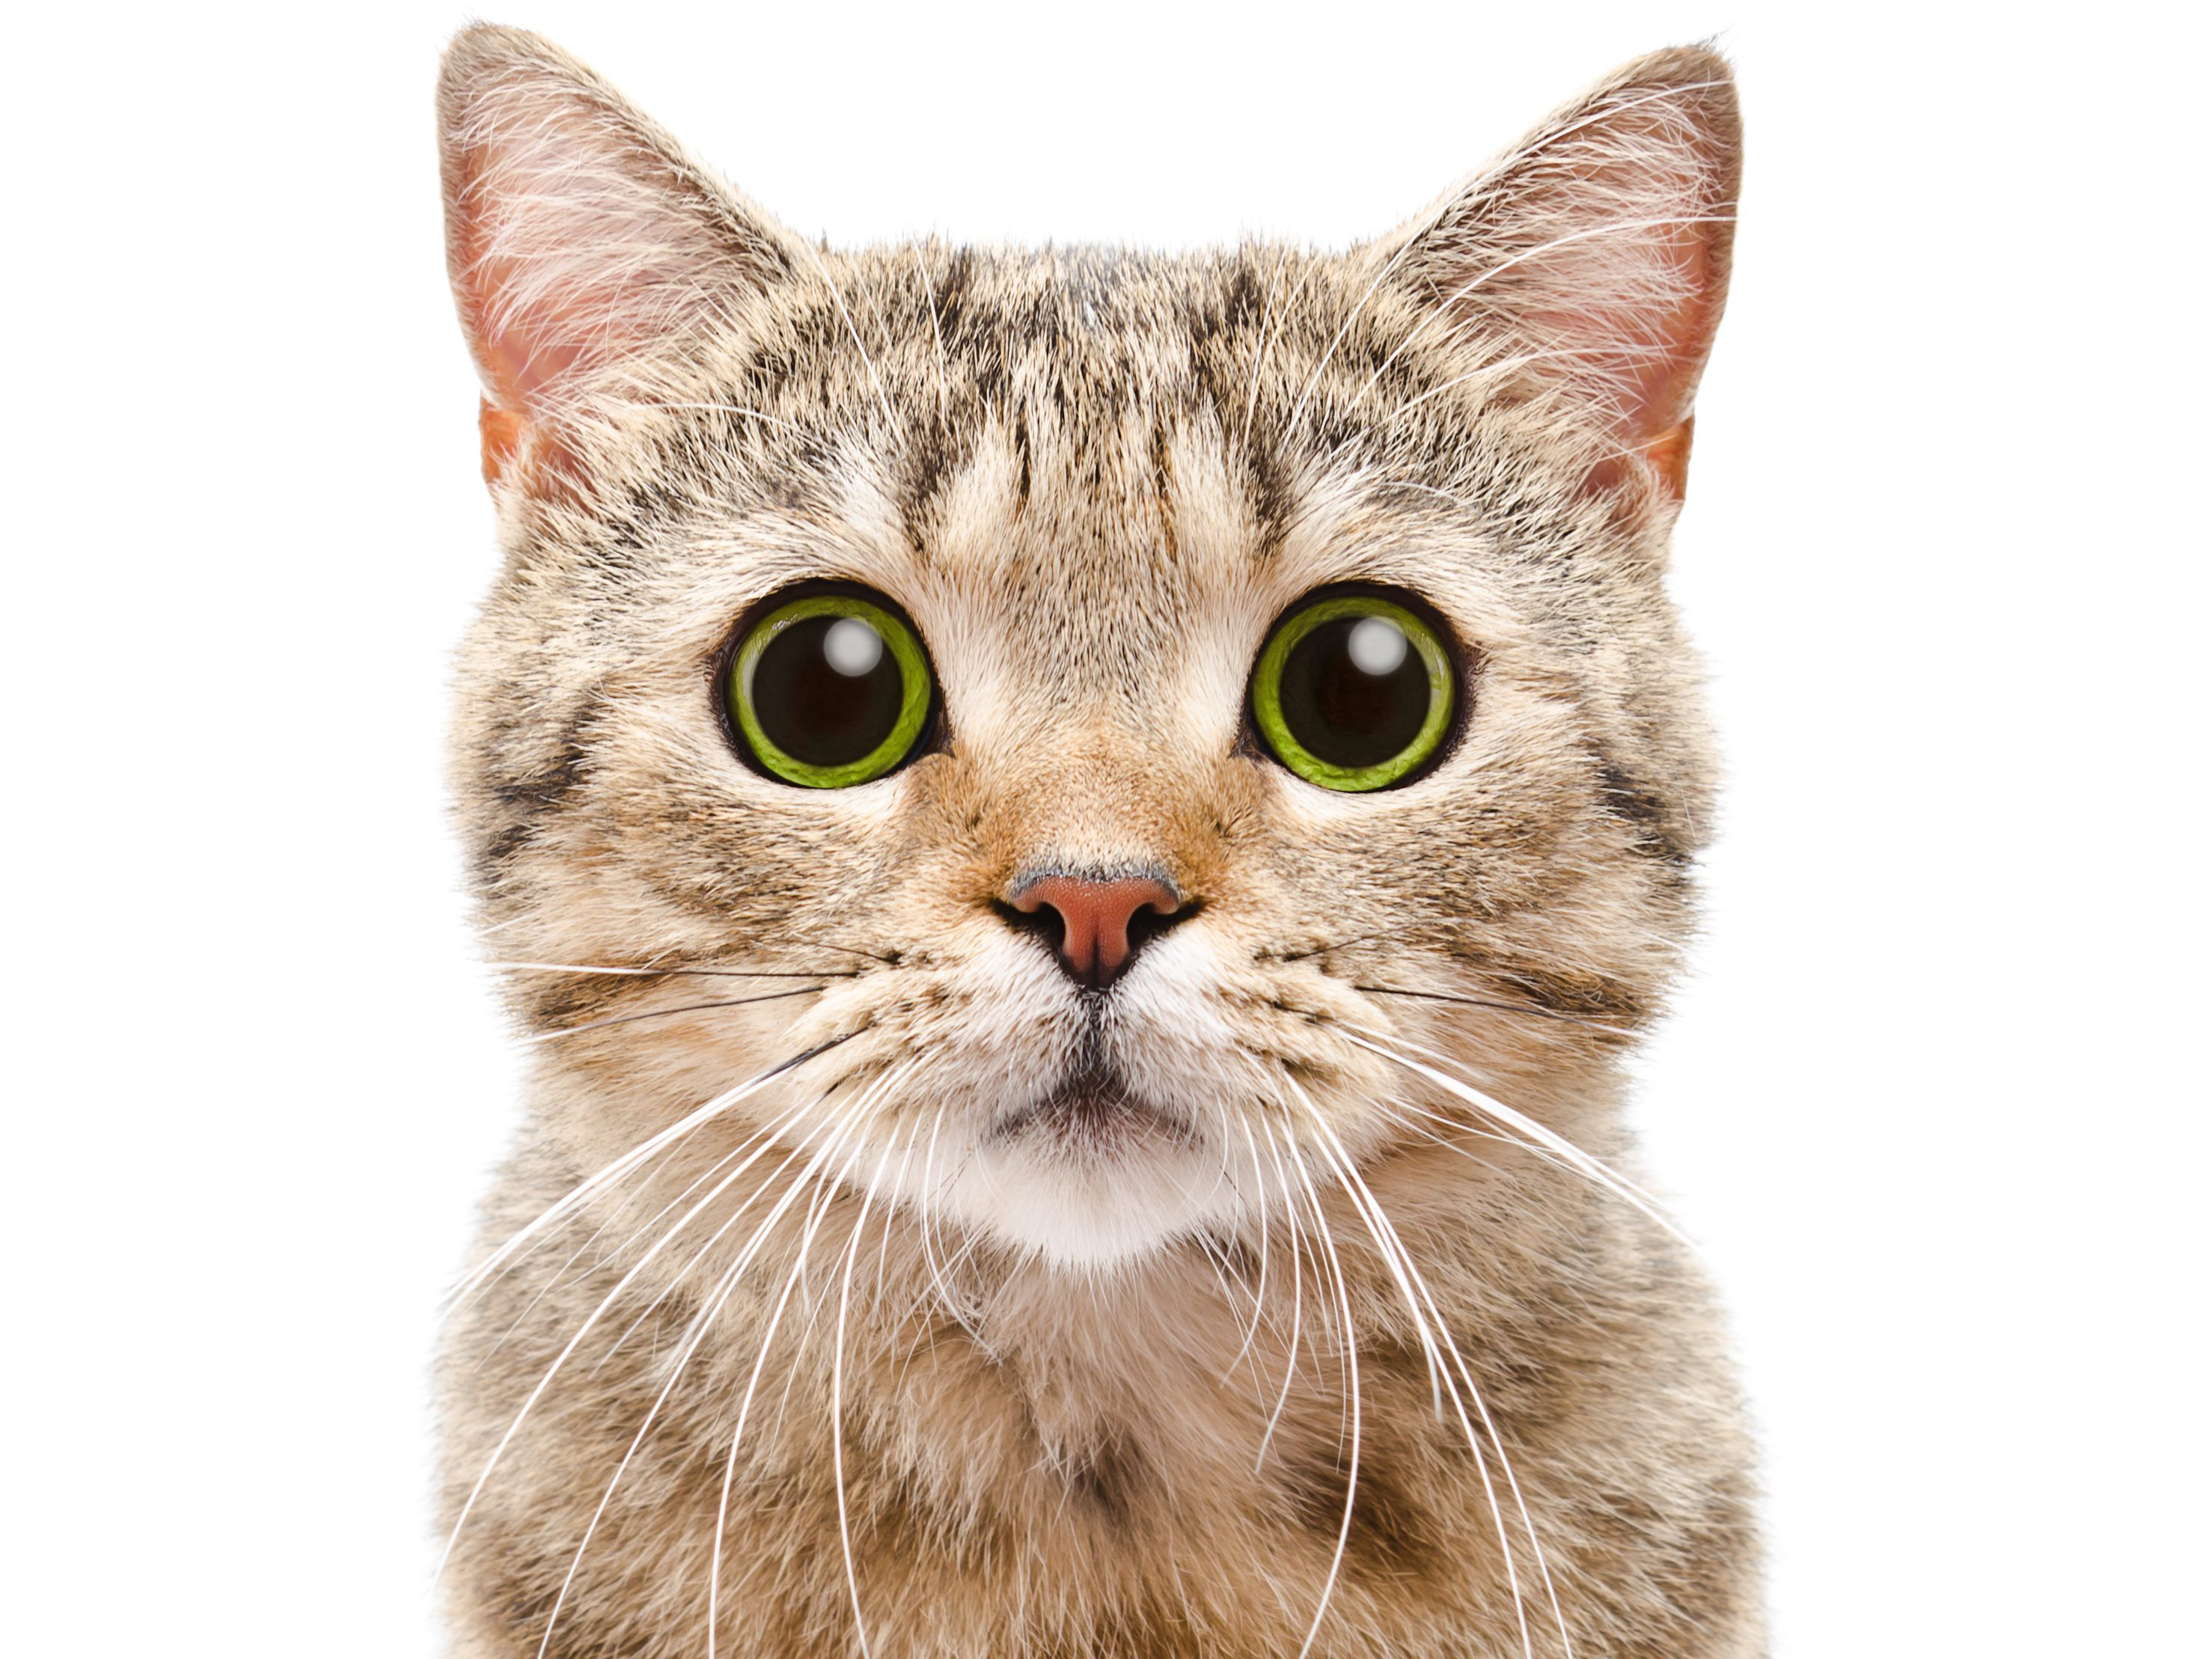

In [3]:
url='https://postmediatorontosun.files.wordpress.com/2019/07/gettyimages-910314172-e1564420108411.jpg'
img = request.urlretrieve(url, 'cat.jpg')
img = Image.open(img[0])
img

In [4]:
preprocess = transforms.Compose([
    transforms.Resize(128), 
    transforms.CenterCrop(128), 
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


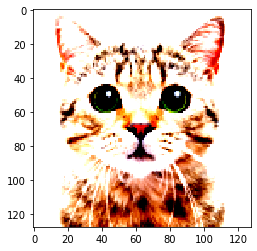

In [5]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

In [6]:
inc.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [7]:
out = inc(batch)
out

tensor([[ 1.4232e+00, -2.0867e+00, -5.3953e-01, -1.7122e+00, -4.3874e-01,
         -8.3434e-02,  1.0529e+00, -1.7242e+00,  4.2101e+00,  4.7868e+00,
          2.3230e+00,  1.3055e+00,  3.6477e+00, -3.4328e+00, -1.5430e+00,
          5.8666e+00,  1.9814e+00,  1.6839e+00, -3.7625e+00, -1.1221e+00,
         -3.4748e+00,  2.6144e+00,  9.9864e-01, -7.3575e-01,  3.2938e+00,
         -9.7921e-01,  4.8000e+00, -2.5654e+00, -2.9958e+00,  1.7071e+00,
          5.6981e+00, -3.6749e-01,  6.7687e-01,  1.2312e+00, -5.8568e-03,
          1.3985e+00,  5.8614e+00, -2.3022e+00,  3.5346e+00,  2.0143e+00,
         -2.8915e+00, -9.7224e-01, -1.4446e+00, -1.9565e+00, -3.1545e+00,
          4.6515e-01, -6.7863e-01,  1.3582e+00, -1.2545e+00, -4.1103e+00,
         -1.9944e+00,  2.4373e+00, -1.4610e+00,  5.2018e-01, -1.8018e+00,
         -3.2960e-01, -5.0463e+00,  2.1769e+00, -2.3002e+00, -1.3756e+00,
         -1.7645e+00, -1.2557e+00, -7.9311e-01, -2.6920e+00, -6.0646e+00,
          1.0798e+00, -1.5864e+00, -6.

In [8]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [9]:
out

tensor([[ 1.4232e+00, -2.0867e+00, -5.3953e-01, -1.7122e+00, -4.3874e-01,
         -8.3434e-02,  1.0529e+00, -1.7242e+00,  4.2101e+00,  4.7868e+00,
          2.3230e+00,  1.3055e+00,  3.6477e+00, -3.4328e+00, -1.5430e+00,
          5.8666e+00,  1.9814e+00,  1.6839e+00, -3.7625e+00, -1.1221e+00,
         -3.4748e+00,  2.6144e+00,  9.9864e-01, -7.3575e-01,  3.2938e+00,
         -9.7921e-01,  4.8000e+00, -2.5654e+00, -2.9958e+00,  1.7071e+00,
          5.6981e+00, -3.6749e-01,  6.7687e-01,  1.2312e+00, -5.8568e-03,
          1.3985e+00,  5.8614e+00, -2.3022e+00,  3.5346e+00,  2.0143e+00,
         -2.8915e+00, -9.7224e-01, -1.4446e+00, -1.9565e+00, -3.1545e+00,
          4.6515e-01, -6.7863e-01,  1.3582e+00, -1.2545e+00, -4.1103e+00,
         -1.9944e+00,  2.4373e+00, -1.4610e+00,  5.2018e-01, -1.8018e+00,
         -3.2960e-01, -5.0463e+00,  2.1769e+00, -2.3002e+00, -1.3756e+00,
         -1.7645e+00, -1.2557e+00, -7.9311e-01, -2.6920e+00, -6.0646e+00,
          1.0798e+00, -1.5864e+00, -6.

In [10]:
_, index = torch.max(out, 1)

In [11]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Egyptian cat', 73.284912109375)

In [12]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Egyptian cat 73.284912109375
tabby, tabby cat 26.164003372192383
tiger cat 0.5510799288749695
pot, flowerpot 1.8446852436682093e-06
lynx, catamount 1.279622324545926e-06


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


toucan 100.0
toucan 100.0
hornbill 1.0114985057942199e-20
king penguin, Aptenodytes patagonica 5.1559465982371336e-23
pay-phone, pay-station 4.098059511875514e-23
school bus 3.7170053003182976e-23


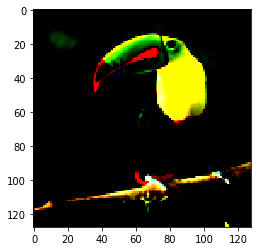

In [13]:
url='https://www.caracteristicas.co/wp-content/uploads/2019/03/tucan-1-e1587393934791.jpg'
img = request.urlretrieve(url, 'tucan.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ostrich, Struthio camelus 99.99633026123047
ostrich, Struthio camelus 99.99633026123047
black swan, Cygnus atratus 0.003664366202428937
peacock 1.293789864575956e-05
llama 2.3102622037640685e-07
Arabian camel, dromedary, Camelus dromedarius 7.091458797958694e-08


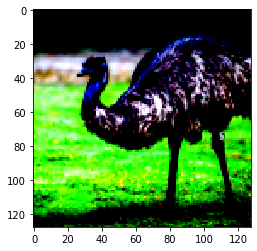

In [14]:
url='https://www.xn--zoologicobaos-skb.com/archivos/animales/emu-zoo-vida-exotica.jpg'
img = request.urlretrieve(url, 'emu.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lion, king of beasts, Panthera leo 98.51707458496094
lion, king of beasts, Panthera leo 98.51707458496094
chimpanzee, chimp, Pan troglodytes 1.4805744886398315
hippopotamus, hippo, river horse, Hippopotamus amphibius 0.001538785407319665
banjo 0.0006463947938755155
triceratops 8.491996413795277e-05


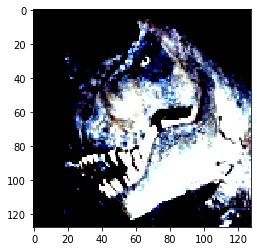

In [15]:
url='https://lh3.googleusercontent.com/proxy/Iq93J2x7OZpG0r0O-pGgihZJ_oJHxGlJ6kqvD15iPEP6AGQ46doIif4lxETLTjyvNXI88HWFL0WM2tVQ8E0dTUgRc2ht8sxDo6-1XhNZBRaS_elzOOyxP5EC'
img = request.urlretrieve(url, 't-rex.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ram, tup 99.99269104003906
ram, tup 99.99269104003906
bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis 0.007309218868613243
ox 1.9328654887566799e-13
hen 3.61645269632315e-16
African elephant, Loxodonta africana 9.271464483712451e-17


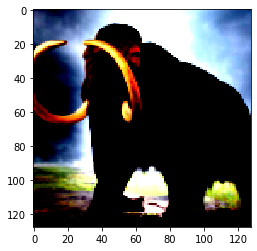

In [16]:
url='https://www.mundoprehistorico.com/wp-content/uploads/Mamut-01.jpg'
img = request.urlretrieve(url, 'mamut.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


basketball 100.0
basketball 100.0
rugby ball 6.2274408221340446e-18
maraca 1.783422700565101e-18
tennis ball 2.031168618999926e-19
croquet ball 6.63987635842604e-20


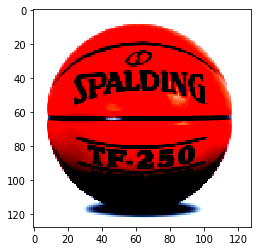

In [17]:
url='https://res-5.cloudinary.com/russell-corp-australia-pty-ltd/image/upload/c_fit,dpr_2.0,f_auto,h_950,q_auto,w_950/media/catalog/product/image/113199a6/tf-250-basketball.jpg'
img = request.urlretrieve(url, 'basketball.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


wig 53.473873138427734
wig 53.473873138427734
military uniform 24.709861755371094
trench coat 4.10280179977417
miniskirt, mini 3.3761348724365234
borzoi, Russian wolfhound 2.1838176250457764


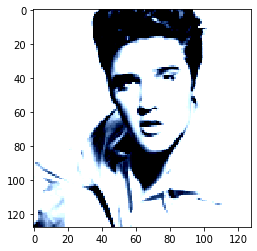

In [18]:
url='https://estaticos.muyinteresante.es/media/cache/760x570_thumb/uploads/images/article/55365e44066de9087b6a6230/frases-elvis.jpg'
img = request.urlretrieve(url, 'elvis.jpg')
img = Image.open(img[0])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

out = inc(batch)

_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())


_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

### Dataset

In [19]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [21]:
len(dataset)

50000

In [22]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2383AB32448>, 9, 'truck')

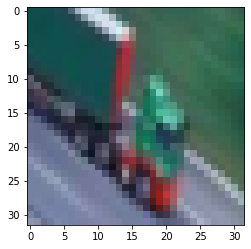

In [23]:
plt.imshow(img)

In [24]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2383AB32448>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0.

In [25]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [26]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [27]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

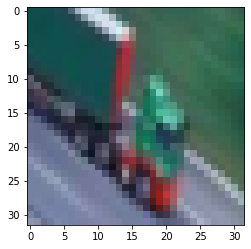

In [28]:
plt.imshow(img.permute(1, 2, 0))

In [29]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [30]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [31]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [32]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [33]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])

In [34]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

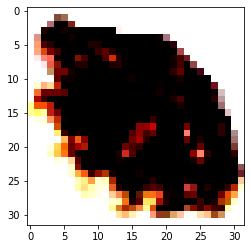

In [35]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]